In [11]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggel dataset'

In [12]:
%cd /content/drive/MyDrive/kaggel dataset

/content/drive/MyDrive/kaggel dataset


In [13]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 95% 214M/225M [00:02<00:00, 58.1MB/s]
100% 225M/225M [00:02<00:00, 94.6MB/s]


In [14]:
!mkdir flowers-recognition
!mv flowers-recognition.zip flowers-recognition

In [15]:
%cd flowers-recognition/

/content/drive/MyDrive/kaggel dataset/flowers-recognition


In [ ]:
!unzip flowers-recognition.zip

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

In [17]:
path = "/content/drive/MyDrive/kaggel dataset/flowers-recognition/flowers"

In [18]:
os.listdir(path)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [19]:
classes = ['daisy','dandelion',  'rose', 'sunflower', 'tulip']

In [21]:
from matplotlib.image import imread

In [22]:
for flower_class in classes:
    class_path = os.path.join(path, flower_class)
    max_values = []
    min_values = []
    for image in os.listdir(class_path):
        img = imread(os.path.join(class_path, image))
        max_val = img.max()
        min_val = img.min()
        max_values.append(max_val)
        min_values.append(min_val)
    max_class_val = max(max_values)
    min_class_val = min(min_values)
    print("***************************")
    print(f"Class: {flower_class}")
    print(f"Max value: {max_class_val}")
    print(f"Min value: {min_class_val}")

print("***************************")

***************************
Class: daisy
Max value: 255
Min value: 0
***************************
Class: dandelion
Max value: 255
Min value: 0
***************************
Class: rose
Max value: 255
Min value: 0
***************************
Class: sunflower
Max value: 255
Min value: 0
***************************
Class: tulip
Max value: 255
Min value: 0
***************************


In [23]:
input_shape = (256,256)
batch_size = 64

In [24]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=input_shape,
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [25]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=input_shape,
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [27]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [29]:
train_ds = train_ds.map(lambda x,y: (x/255, y))
val_ds = val_ds.map(lambda x,y: (x/255, y))
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

In [32]:
input_shape =  (256,256,3)
num_classes = len(classes)

In [33]:
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#ANN

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [34]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0

In [35]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
54/54 [==============================] - 268s 5s/step - loss: 1.5163 - accuracy: 0.3109 - val_loss: 1.3902 - val_accuracy: 0.4090
Epoch 2/10
54/54 [==============================] - 247s 5s/step - loss: 1.1690 - accuracy: 0.5180 - val_loss: 1.0190 - val_accuracy: 0.6072
Epoch 3/10
54/54 [==============================] - 247s 5s/step - loss: 0.9800 - accuracy: 0.6202 - val_loss: 0.9613 - val_accuracy: 0.6083
Epoch 4/10
54/54 [==============================] - 253s 5s/step - loss: 0.8636 - accuracy: 0.6676 - val_loss: 0.9279 - val_accuracy: 0.6385
Epoch 5/10
54/54 [==============================] - 272s 5s/step - loss: 0.7936 - accuracy: 0.7021 - val_loss: 1.0037 - val_accuracy: 0.6130
Epoch 6/10
54/54 [==============================] - 295s 5s/step - loss: 0.6243 - accuracy: 0.7719 - val_loss: 0.9857 - val_accuracy: 0.6512
Epoch 7/10
54/54 [==============================] - 261s 5s/step - loss: 0.4896 - accuracy: 0.8280 - val_loss: 1.0610 - val_accuracy: 0.6582
Epoch 8/10
54

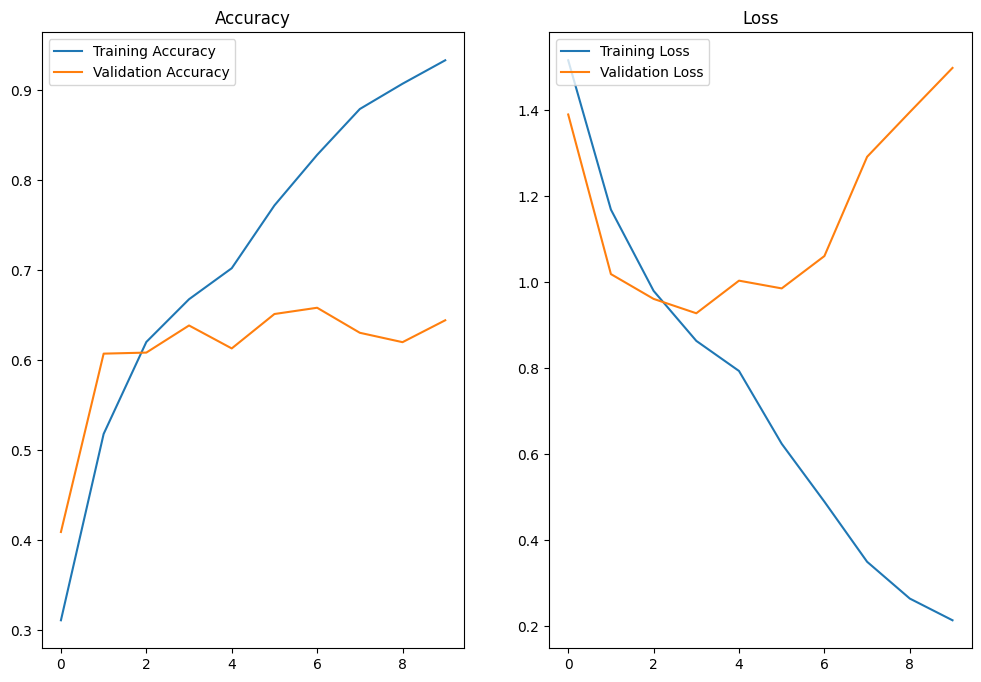

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Loss')
plt.show()